# Loan Defaulter Prediction

## Problem Statement
- The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.
- After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.
- This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with bank, the investors perform a due diligence on the requested loan application. Keep this in mind while understanding data.
- In this challenge, you will help this bank by predicting the probability that a member will default.

## Data Acquisition:
- Download the dataset from the following link: https://drive.google.com/drive/folders/15rWe7Mq7BgEyTQ7OZKLK-avJ0L9oveXP?usp=sharing

## Machine Learning task : 
- Binary Classification {Defaulter:1 , Non- Defaulter:0}

##Evaluation Metric:
- Since the data was imbalanced, So , metric used is ROC-AUC

## Approach
- Load data
- Exploratory Data Analysis
- Transform data (data cleansing)
- Handling Missing value 
- Categorize/Dummify
- Split - train and cross validation sets
- Modelling using different models
- Predict

In [1]:
cd drive/My\ Drive/Artivatic

/content/drive/My Drive/Artivatic


In [2]:
!pip install catboost

In [3]:
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.metrics import roc_curve, auc


# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
train = pd.read_csv('train_indessa.csv')
test= pd.read_csv('test_indessa.csv')
submission = pd.read_csv('sample_submission.csv')

In [5]:
test_member_id = pd.DataFrame(test['member_id'])

In [6]:
# Class Label : Binary Classification
train_target = pd.DataFrame(train['loan_status'])

In [7]:
train_target['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [8]:
train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [9]:
train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

## DATA PREPROCESSING

## Term feature

36 months    372793
60 months    159635
Name: term, dtype: int64


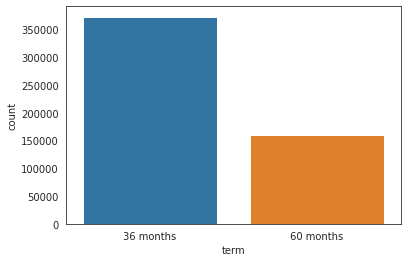

In [10]:
ax = sns.countplot(x=train['term'], data=train)
print(train['term'].value_counts())

In [11]:
train['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
test['term'].replace(to_replace=' months', value='', regex=True, inplace=True)

# Convert it to numeric
train['term'] = pd.to_numeric(train['term'], errors='coerce')
test['term'] = pd.to_numeric(test['term'], errors='coerce')

36    372793
60    159635
Name: term, dtype: int64


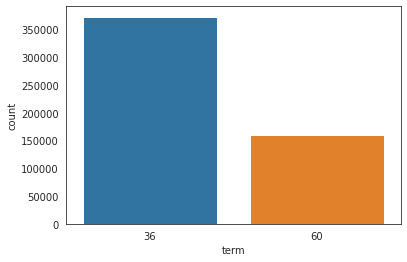

In [12]:
ax = sns.countplot(x=train['term'], data=train)
print(train['term'].value_counts())

## Emp length feature
- employment length, where 0 means less than one year and 10 means ten or more years

10+ years    175105
2 years       47276
< 1 year      42253
3 years       42175
1 year        34202
5 years       33393
4 years       31581
7 years       26680
8 years       26443
6 years       25741
9 years       20688
Name: emp_length, dtype: int64


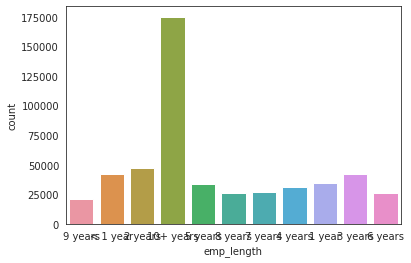

In [13]:
ax = sns.countplot(x=train['emp_length'], data=train)
print(train['emp_length'].value_counts())

In [14]:
train['emp_length'].replace('n/a', '0', inplace=True)
train['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
train['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
train['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
train['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

test['emp_length'].replace('n/a', '0', inplace=True)
test['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
test['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
test['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
test['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
train['emp_length'] = pd.to_numeric(train['emp_length'], errors='coerce')
test['emp_length'] = pd.to_numeric(test['emp_length'], errors='coerce')

10.0    175105
2.0      47276
0.0      42253
3.0      42175
1.0      34202
5.0      33393
4.0      31581
7.0      26680
8.0      26443
6.0      25741
9.0      20688
Name: emp_length, dtype: int64


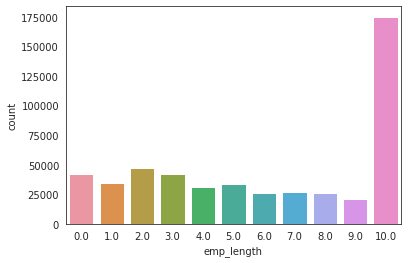

In [15]:
ax = sns.countplot(x=train['emp_length'], data=train)
print(train['emp_length'].value_counts())

## sub grade feature 
- grade assigned by the bank

B3    33844
B4    33198
C1    31975
C2    31356
C3    30080
B2    29390
B5    29313
C4    29103
A5    27016
B1    26968
C5    24985
D1    21712
A4    20823
D2    17991
D3    15771
D4    15226
A3    14082
A1    13653
A2    13533
D5    12867
E1    10928
E2    10255
E3     8488
E4     7051
E5     5773
F1     4350
F2     3196
F3     2708
F4     2056
F5     1516
G1     1112
G2      824
G3      559
G4      391
G5      335
Name: sub_grade, dtype: int64


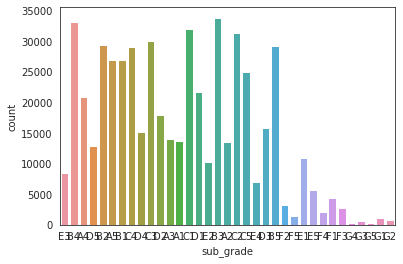

In [16]:
ax = sns.countplot(x=train['sub_grade'], data=train)
print(train['sub_grade'].value_counts())

In [17]:
train['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
train['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
train['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
train['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
train['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
train['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
train['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)

test['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
test['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
test['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
test['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
test['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
test['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
test['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)

# Convert it to numeric
train['sub_grade'] = pd.to_numeric(train['sub_grade'], errors='coerce')
test['sub_grade'] = pd.to_numeric(test['sub_grade'], errors='coerce')

13    33844
14    33198
21    31975
22    31356
23    30080
12    29390
15    29313
24    29103
5     27016
11    26968
25    24985
31    21712
4     20823
32    17991
33    15771
34    15226
3     14082
1     13653
2     13533
35    12867
41    10928
42    10255
43     8488
44     7051
45     5773
51     4350
52     3196
53     2708
54     2056
55     1516
61     1112
62      824
63      559
64      391
65      335
Name: sub_grade, dtype: int64


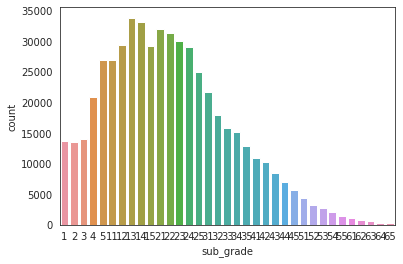

In [18]:
ax = sns.countplot(x=train['sub_grade'], data=train)
print(train['sub_grade'].value_counts())

## last_week_pay feature

In [19]:
train['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
test['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

train['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
test['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
train['last_week_pay'] = pd.to_numeric(train['last_week_pay'], errors='coerce')
test['last_week_pay'] = pd.to_numeric(test['last_week_pay'], errors='coerce')

## Handling Missing Values or NaN's

In [20]:
train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [21]:
test.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

## Getting the columns having nulls

In [22]:
#Droping columns based on number of empty values
#for TRAINING data
colsDropped = []
for col_names in train.columns:
    if(train[col_names].isnull().sum() > 0):
        colsDropped.append(col_names)
print(colsDropped)

['batch_enrolled', 'emp_title', 'emp_length', 'annual_inc', 'desc', 'title', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'verification_status_joint', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [23]:
#Droping columns based on number of empty values
#for TESTING data
colsDropped = []
for col_names in test.columns:
    if(train[col_names].isnull().sum() > 0):
        colsDropped.append(col_names)
print(colsDropped)

['batch_enrolled', 'emp_title', 'emp_length', 'annual_inc', 'desc', 'title', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'verification_status_joint', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [24]:
cate_cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cate_cols:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(test[col].median(), inplace=True)


num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in num_cols:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)


In [25]:
cat_attr = ['home_ownership', 'purpose']
for cat in cat_attr:
   df_col = [cat]
   train[cat] = train[cat].astype("category")
   train[cat] = pd.get_dummies(train, columns=df_col)

   
   test[cat] = test[cat].astype("category")
   test[cat] = pd.get_dummies(test, columns=df_col)

## Feature Enginering

In [26]:
train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [27]:
finalTrain=train.copy()
finalTrain = finalTrain.drop(['loan_status'],axis=1)

finalTest=test.copy()


In [28]:
finalTrain.shape , finalTest.shape

((532428, 44), (354951, 44))

In [29]:
import math

# How big the loan a person has taken with respect to his earnings, annual income to fund by bank ratio
finalTrain['income_to_loan'] = np.round_(finalTrain['annual_inc']/finalTrain['funded_amnt'],decimals = 2)
finalTest['income_to_loan'] = np.round_(finalTest['annual_inc']/finalTest['funded_amnt'],decimals = 2)


# How big the loan a person has taken with respect to his earnings, annual income to fund by investors ratio
finalTrain['income_to_loan_inv'] = np.round_(finalTrain['annual_inc']/finalTrain['funded_amnt_inv'],decimals = 2)
finalTest['income_to_loan_inv'] = np.round_(finalTest['annual_inc']/finalTest['funded_amnt_inv'],decimals = 2)


# Interest paid so far = interest received till date + Late fee received till date
finalTrain['total_int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['total_int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']

# Calculating EMIs (monthly)
#EMI = [P x R x (1+R)^N]/[(1+R)^N-1]
P_tr=finalTrain['loan_amnt']
r_tr=finalTrain['int_rate'] /(100*12)
n_tr=finalTrain['term']

P_te=finalTest['loan_amnt']
r_te=finalTest['int_rate'] /(100*12)
n_te=finalTest['term']

finalTrain['emi_per_month'] = np.round_((P_tr * r_tr * (1+r_tr)**n_tr)/((1+r_tr)**(n_tr)-1),decimals = 2)
finalTest['emi_per_month']= np.round_((P_te * r_te * (1+r_te)**n_te)/((1+r_te)**(n_te)-1),decimals = 2)

# Calculating EMIs paid (in terms of percent)np.round_(in_array, decimals = 3)
finalTrain['emi_paid_perc'] = np.round_(((finalTrain['last_week_pay'])/(finalTrain['term']/12*52+1))*100,decimals = 2)
finalTest['emi_paid_perc'] = np.round_(((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100),decimals = 2)


In [30]:
finalTrain.shape, finalTest.shape

((532428, 49), (354951, 49))

## Vectorising 'batch_enrolled' feature

In [31]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# finalTrain['batch_enrolled'] = finalTrain['batch_enrolled'].fillna('missing')
# finalTest['batch_enrolled'] = finalTest['batch_enrolled'].fillna('missing')

# v = TfidfVectorizer(min_df=3,  max_features=None, 
#             strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
#             ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
#             stop_words = 'english')

# x_tr = v.fit_transform(finalTrain['batch_enrolled'])
# x_te = v.transform(finalTest['batch_enrolled'])

In [32]:
# x_tr.shape , x_te.shape

In [33]:
# df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
# df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

# res_train = pd.concat([finalTrain, df_tr], axis=1)
# res_test = pd.concat([finalTest, df_te], axis=1)


# res_train.drop('batch_enrolled',axis=1,inplace=True)
# res_test.drop('batch_enrolled',axis=1,inplace=True)

In [34]:
cols = ['grade','emp_title','verification_status_joint','verification_status','pymnt_plan','desc','purpose','title','zip_code','addr_state','initial_list_status', 'application_type']

for col in cols:
    finalTrain[col].fillna('missing', inplace=True)
    finalTest[col].fillna('missing', inplace=True)


In [35]:
finalTrain.fillna(0)
finalTest.fillna(0)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,income_to_loan,income_to_loan_inv,total_int_paid,emi_per_month,emi_paid_perc
0,11937648,14000,14000,14000.0,60,BAT4711174,16.24,C,25,Data Analyst,4.0,11937648,73500.0,Source Verified,n,missing,11937648,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,70.0,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,44.0,INDIVIDUAL,missing,104.0,0.0,0.0,85230.0,45700.0,5.25,5.25,3915.61,342.24,39.85
1,38983318,16000,16000,16000.0,60,BAT4318899,9.49,B,12,Senior Database Administrator,5.0,38983318,105000.0,Source Verified,n,missing,38983318,Major purchase,275xx,NC,31.19,0.0,0.0,31.0,70.0,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,44.0,INDIVIDUAL,missing,57.0,0.0,0.0,444991.0,21400.0,6.56,6.56,1495.06,335.95,21.84
2,27999917,11050,11050,11050.0,60,BAT446479,15.61,D,31,Customer service representative,10.0,27999917,62300.0,Not Verified,n,missing,27999917,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,missing,70.0,0.0,0.0,105737.0,16300.0,5.64,5.64,2096.21,266.43,26.82
3,61514932,35000,35000,34700.0,60,BAT4664105,12.69,C,22,ACCT OFFICER,10.0,61514932,150000.0,Source Verified,n,missing,61514932,Debt consolidation,961xx,CA,17.27,0.0,0.0,31.0,70.0,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,44.0,INDIVIDUAL,missing,22.0,0.0,0.0,287022.0,72400.0,4.29,4.32,1756.31,790.81,8.43
4,59622821,6500,6500,6500.0,36,,6.89,A,3,Paralegal,5.0,59622821,52000.0,Not Verified,n,missing,59622821,Major purchase,707xx,LA,20.19,0.0,0.0,31.0,70.0,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,44.0,INDIVIDUAL,missing,22.0,0.0,0.0,234278.0,26700.0,8.00,8.00,172.21,200.37,14.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,19145105,15000,15000,15000.0,36,BAT4217242,6.49,A,2,Network administrator,1.0,19145105,97250.0,Not Verified,n,missing,19145105,Credit card refinancing,761xx,TX,12.46,0.0,0.0,77.0,70.0,12.0,0.0,12201,27.7,24.0,w,1180.32,0.0,0.0,0.0,0.0,77.0,INDIVIDUAL,missing,83.0,0.0,0.0,143920.0,44000.0,6.48,6.48,1180.32,459.67,52.87
354947,46304777,35000,35000,35000.0,60,,25.89,G,63,Credit Risk Analyst,1.0,46304777,180000.0,Verified,n,missing,46304777,Debt consolidation,115xx,NY,11.78,2.0,2.0,19.0,70.0,21.0,0.0,52584,61.4,33.0,f,6508.41,0.0,0.0,0.0,0.0,44.0,INDIVIDUAL,missing,39.0,0.0,0.0,772713.0,85700.0,5.14,5.14,6508.41,1045.64,14.94
354948,903745,14000,14000,13975.0,60,BAT6117184,17.51,E,44,USPS/Nashua L&DC,10.0,903745,56000.0,Verified,n,I will be using the loan money to pay off the ...,903745,Debt Consolidation,038xx,NH,16.44,0.0,3.0,54.0,103.0,11.0,1.0,10948,66.1,25.0,f,3456.24,0.0,0.0,0.0,0.0,44.0,INDIVIDUAL,missing,87.0,0.0,0.0,80369.0,23700.0,4.00,4.01,3456.24,351.79,33.33
354949,53032475,20000,20000,20000.0,36,BAT3840785,7.26,A,4,Computer Engineer,0.0,53032475,100000.0,Source Verified,n,missing,53032475,Credit card refinancing,206xx,MD,15.00,0.0,0.0,31.0,70.0,7.0,0.0,33599,61.5,11.0,w,766.84,0.0,0.0,0.0,0.0,44.0,INDIVIDUAL,missing,35.0,0.0,0.0,291998.0,54600.0,5.00,5.00,766.84,619.92,22.29


In [36]:
finalTrain.reset_index(inplace=True)
finalTest.reset_index(inplace=True)

## vectorising grade feature

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

x_tr = v.fit_transform(finalTrain['grade'])
x_te = v.transform(finalTest['grade'])

print(x_tr.shape , x_te.shape)

df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

res_train = pd.concat([finalTrain, df_tr], axis=1)
res_test = pd.concat([finalTest, df_te], axis=1)


res_train.drop('grade',axis=1,inplace=True)
res_test.drop('grade',axis=1,inplace=True)

print(res_train.shape , res_test.shape)


(532428, 6) (354951, 6)
(532428, 55) (354951, 55)


## vectorising emp_title feature

In [38]:
# preprocessed_grade_tr = []
# for i in res_train['emp_title']:
#   preprocessed_grade_tr.append(i.replace(' ','_'))

# preprocessed_grade_te = []
# for i in res_test['emp_title']:
#   preprocessed_grade_te.append(i.replace(' ','_'))


In [39]:
# res_train['clean_emp_title'] = preprocessed_grade_tr
# res_train.drop(['emp_title'], axis=1)

# res_test['clean_emp_title'] = preprocessed_grade_te
# res_test.drop(['emp_title'], axis=1)

In [40]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# v = TfidfVectorizer(min_df=3,  max_features=100, 
#             strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
#             ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
#             stop_words = 'english')

# x_tr = v.fit_transform(res_train['emp_title'])
# x_te = v.transform(res_test['emp_title'])

# print(x_tr.shape , x_te.shape)

# df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
# df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

# res_train = pd.concat([res_train, df_tr], axis=1)
# res_test = pd.concat([res_test, df_te], axis=1)


# res_train.drop('emp_title',axis=1,inplace=True)
# res_test.drop('emp_title',axis=1,inplace=True)

# print(res_train.shape , res_test.shape)


## Vectorise verification status

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

x_tr = v.fit_transform(res_train['verification_status'])
x_te = v.transform(res_test['verification_status'])

print(x_tr.shape , x_te.shape)

df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

res_train = pd.concat([res_train, df_tr], axis=1)
res_test = pd.concat([res_test, df_te], axis=1)


res_train.drop('verification_status',axis=1,inplace=True)
res_test.drop('verification_status',axis=1,inplace=True)

print(res_train.shape , res_test.shape)


(532428, 3) (354951, 3)
(532428, 57) (354951, 57)


## Vectorising verification_status_joint

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

x_tr = v.fit_transform(res_train['verification_status_joint'])
x_te = v.transform(res_test['verification_status_joint'])

print(x_tr.shape , x_te.shape)

df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

res_train = pd.concat([res_train, df_tr], axis=1)
res_test = pd.concat([res_test, df_te], axis=1)


res_train.drop('verification_status_joint',axis=1,inplace=True)
res_test.drop('verification_status_joint',axis=1,inplace=True)

print(res_train.shape , res_test.shape)


(532428, 4) (354951, 4)
(532428, 60) (354951, 60)


## Vectorise pymnt_plan

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

x_tr = v.fit_transform(res_train['pymnt_plan'])
x_te = v.transform(res_test['pymnt_plan'])

print(x_tr.shape , x_te.shape)

df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

res_train = pd.concat([res_train, df_tr], axis=1)
res_test = pd.concat([res_test, df_te], axis=1)


res_train.drop('pymnt_plan',axis=1,inplace=True)
res_test.drop('pymnt_plan',axis=1,inplace=True)

print(res_train.shape , res_test.shape)


(532428, 2) (354951, 2)
(532428, 61) (354951, 61)


## Vectorising title

In [44]:
# preprocessed_grade_tr = []
# for i in res_train['title']:
#   preprocessed_grade_tr.append(i.replace(' ','_'))

# preprocessed_grade_te = []
# for i in res_test['title']:
#   preprocessed_grade_te.append(i.replace(' ','_'))


# res_train['clean_title'] = preprocessed_grade_tr
# res_train.drop(['title'], axis=1)

# res_test['clean_title'] = preprocessed_grade_te
# res_test.drop(['title'], axis=1)

In [45]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# v = TfidfVectorizer(min_df=3,  max_features=100, 
#             strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
#             ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
#             stop_words = 'english')

# x_tr = v.fit_transform(res_train['clean_title'])
# x_te = v.transform(res_test['clean_title'])

# print(x_tr.shape , x_te.shape)

# df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
# df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

# res_train = pd.concat([res_train, df_tr], axis=1)
# res_test = pd.concat([res_test, df_te], axis=1)


# res_train.drop('clean_title',axis=1,inplace=True)
# res_test.drop('clean_title',axis=1,inplace=True)

# print(res_train.shape , res_test.shape)


In [46]:
# res_train.drop('title',axis=1,inplace=True)
# res_test.drop('title',axis=1,inplace=True)


## Vectorising addr_state

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

x_tr = v.fit_transform(res_train['addr_state'])
x_te = v.transform(res_test['addr_state'])

print(x_tr.shape , x_te.shape)

df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

res_train = pd.concat([res_train, df_tr], axis=1)
res_test = pd.concat([res_test, df_te], axis=1)


res_train.drop('addr_state',axis=1,inplace=True)
res_test.drop('addr_state',axis=1,inplace=True)

print(res_train.shape , res_test.shape)


(532428, 46) (354951, 46)
(532428, 106) (354951, 106)


## Vectorising initial_list_status

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

x_tr = v.fit_transform(res_train['initial_list_status'])
x_te = v.transform(res_test['initial_list_status'])

print(x_tr.shape , x_te.shape)

df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

res_train = pd.concat([res_train, df_tr], axis=1)
res_test = pd.concat([res_test, df_te], axis=1)


res_train.drop('initial_list_status',axis=1,inplace=True)
res_test.drop('initial_list_status',axis=1,inplace=True)

print(res_train.shape , res_test.shape)


(532428, 2) (354951, 2)
(532428, 107) (354951, 107)


## Vectorising application_type

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

x_tr = v.fit_transform(res_train['application_type'])
x_te = v.transform(res_test['application_type'])

print(x_tr.shape , x_te.shape)

df_tr = pd.DataFrame(x_tr.toarray(), columns=v.get_feature_names())
df_te = pd.DataFrame(x_te.toarray(), columns=v.get_feature_names())

res_train = pd.concat([res_train, df_tr], axis=1)
res_test = pd.concat([res_test, df_te], axis=1)


res_train.drop('application_type',axis=1,inplace=True)
res_test.drop('application_type',axis=1,inplace=True)

print(res_train.shape , res_test.shape)


(532428, 2) (354951, 2)
(532428, 108) (354951, 108)


In [50]:
res_train.drop(['desc','zip_code','emp_title','title','batch_enrolled'], axis=1, inplace=True)
res_test.drop(['desc','zip_code','emp_title','title','batch_enrolled'], axis=1, inplace=True)

In [51]:
res_train.tail()

,index,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,income_to_loan,income_to_loan_inv,total_int_paid,emi_per_month,emi_paid_perc,b,c,...,ia,id,il,ks,ky,la,ma,md,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy,f,w,individual,joint
532423,532423,31296187,20000,20000,20000.0,36,12.49,15,10.0,31296187,75000.0,31296187,14.53,0.0,0.0,31.0,51.0,12.0,1.0,15775.0,63.6,34.0,2595.45,0.0,0.0,0.0,0.0,44.0,65.0,0.0,0.0,83087.0,24800.0,3.75,3.75,2595.45,668.98,41.40,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
532424,532424,29403184,12000,12000,12000.0,60,14.99,25,10.0,29403184,59000.0,29403184,22.97,0.0,0.0,31.0,81.0,10.0,1.0,9453.0,53.1,29.0,2182.92,0.0,0.0,0.0,0.0,44.0,70.0,0.0,0.0,227812.0,17800.0,4.92,4.92,2182.92,285.42,26.82,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
532425,532425,7357607,18725,18725,18725.0,60,20.80,41,8.0,7357607,42504.0,7357607,27.27,0.0,1.0,26.0,70.0,14.0,0.0,12085.0,49.9,26.0,645.32,0.0,0.0,0.0,0.0,44.0,9.0,0.0,0.0,26010.0,24200.0,2.27,2.27,645.32,504.47,3.45,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
532426,532426,23182668,21000,21000,21000.0,60,16.29,32,1.0,23182668,50000.0,23182668,14.91,0.0,1.0,31.0,70.0,7.0,0.0,20902.0,89.7,14.0,4619.79,0.0,0.0,0.0,0.0,44.0,78.0,0.0,0.0,29197.0,23300.0,2.38,2.38,4619.79,513.92,29.89,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
532427,532427,46122259,10000,10000,10000.0,36,6.39,2,0.0,46122259,53000.0,46122259,17.80,0.0,0.0,31.0,70.0,11.0,0.0,10058.0,46.4,20.0,467.52,0.0,0.0,0.0,0.0,44.0,44.0,0.0,0.0,47866.0,21700.0,5.30,5.30,467.52,305.99,28.03,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [52]:
def scaler():
    result = res_train.copy()
    for feature_name in res_train.columns:
        max_value = res_train[feature_name].max()
        min_value = res_train[feature_name].min()
        result[feature_name] = (res_train[feature_name] - min_value) / (max_value - min_value)
    return result

In [53]:
def scaler_te():
    result = res_test.copy()
    for feature_name in res_test.columns:
        max_value = res_test[feature_name].max()
        min_value = res_test[feature_name].min()
        result[feature_name] = (res_test[feature_name] - min_value) / (max_value - min_value)
    return result

In [54]:
res_train_enc= scaler()

In [55]:
res_test_enc= scaler_te()

## Train-Test Split

In [56]:

from sklearn.model_selection import train_test_split

# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(res_train_enc), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

In [57]:
X_train.shape, y_train.shape,X_test.shape,  y_test.shape

((372699, 103), (372699, 1), (159729, 103), (159729, 1))

In [126]:
#CATBoost
from sklearn.metrics import roc_auc_score

from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(learning_rate=0.1, n_estimators=1000, subsample=0.70, max_depth=5, scale_pos_weight=2.5, silent=True)
cb_clf.fit(X_train, y_train)

# evaluate predictions
y_train_predict_cb = cb_clf.predict(X_train)
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_cb))

# make predictions for test data
y_pred_cb = cb_clf.predict(X_test)
predictions = [round(value) for value in y_pred_cb]


accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))

print('Test Accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print('Precision Score %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_test, predictions))


Train Accuracy 0.940
ROC-AUC: 93.3757372225%
Test Accuracy 0.939
[[115232   6919]
 [  2850  34728]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96    122151
           1       0.83      0.92      0.88     37578

    accuracy                           0.94    159729
   macro avg       0.90      0.93      0.92    159729
weighted avg       0.94      0.94      0.94    159729

Precision Score 0.834
Recall Score 0.924
F1 Score 0.877


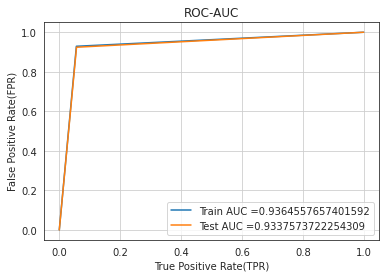

In [127]:
y_train_pred = cb_clf.predict(X_train)    
y_test_pred = cb_clf.predict(X_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

In [128]:
#XGBOOST

from xgboost import XGBClassifier

xg = XGBClassifier(scale_pos_weight=2.5 ,silent=True)
    
xg.fit(X_train, y_train)


# evaluate predictions
y_train_predict_xg = xg.predict(X_train)
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_xg))

# make predictions for test data
y_pred_xg = xg.predict(X_test)
predictions = [round(value) for value in y_pred_xg]

accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


print('Test Accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print('Precision Score %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_test, predictions))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy 0.927
ROC-AUC: 90.1765772290%
Test Accuracy 0.928
[[116167   5984]
 [  5542  32036]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    122151
           1       0.84      0.85      0.85     37578

    accuracy                           0.93    159729
   macro avg       0.90      0.90      0.90    159729
weighted avg       0.93      0.93      0.93    159729

Precision Score 0.843
Recall Score 0.853
F1 Score 0.848


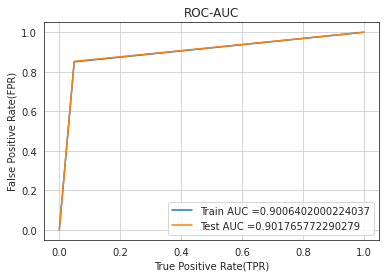

In [129]:
y_train_pred = xg.predict(X_train)    
y_test_pred = xg.predict(X_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC-AUC")
plt.grid()
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score

#LGBM
from lightgbm import LGBMClassifier


lgbm = LGBMClassifier(objective ="binary",verbosity = -1, learning_rate=0.1, n_estimators=1000, scale_pos_weight=2.5)
    
lgbm.fit(X_train, y_train)


# evaluate predictions
y_train_predict_lgbm = lgbm.predict(X_train)
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_lgbm))

# make predictions for test data
y_pred_lgbm = lgbm.predict(X_test)
predictions = [round(value) for value in y_pred_lgbm]


accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


print('Test Accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print('Precision Score %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_test, predictions))

Train Accuracy 0.951
ROC-AUC: 93.2427178211%
Test Accuracy 0.938
[[115255   6888]
 [  2960  34626]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96    122143
           1       0.83      0.92      0.88     37586

    accuracy                           0.94    159729
   macro avg       0.90      0.93      0.92    159729
weighted avg       0.94      0.94      0.94    159729

Precision Score 0.834
Recall Score 0.921
F1 Score 0.875


## Pickle all the models

In [87]:
#from sklearn.externals import joblib 
# Save the model as a pickle in a file 
#joblib.dump(xg, 'xgboost.pkl') 
#joblib.dump(cb_clf, 'catboost.pkl') 
#joblib.dump(lgbm, 'lgbm.pkl') 

['lgbm.pkl']

In [84]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Model Used", "ROC-AUC","Test Accuracy(%)"]

x.add_row(["CatBoost Classifier",  93.37,93.9])
x.add_row(["XGBoost Classifier",  90.17, 92.8])
x.add_row(["LGBM Classifier",  93.24, 93.8])

print(x)

+---------------------+---------+------------------+
|      Model Used     | ROC-AUC | Test Accuracy(%) |
+---------------------+---------+------------------+
| CatBoost Classifier |  93.37  |       93.9       |
|  XGBoost Classifier |  90.17  |       92.8       |
|   LGBM Classifier   |  93.24  |       93.8       |
+---------------------+---------+------------------+


## CONCLUSION :
- CatBoost is the clear winner here and all the models have done a good job.
- Performance can be increaded further by considering text features too which I had to ignore since it would make the dimensions huge and since the number of data points were also large , the system was crashing.
- So, even with these features and few of engineered features , the model is performing very good.